Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0001 cost = 3.203775419
Epoch:  0002 cost = 1.175599500
Epoch:  0003 cost = 0.913826845
Epoch:  0004 cost = 0.789088005
Epoch:  0005 cost = 0.713262603
Epoch:  0006 cost = 0.659079781
Epoch:  0007 cost = 0.620121796
Epoch:  0008 cost = 0.588635388
Epoch:  0009 cost = 0.563408179
Epoch:  0010 cost = 0.542179903
Epoch:  0011 cost = 0.524559980
Epoch:  0012 cost = 0.509191895
Epoch:  0013 cost = 0.495395488
Epoch:  0014 cost = 0.483320966
Epoch:  0015 cost = 0.472397557
Accuracy:  0.8914
Label:  [6]
Prediction:  [6]


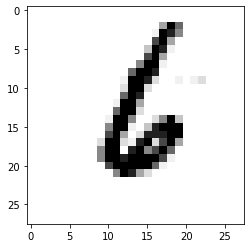

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(999)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer= tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', '%04d' %(epoch + 1), 'cost =','{:.9f}'.format(avg_cost))
    print("Accuracy: ",accuracy.eval(session = sess, feed_dict={X:mnist.test.images, 
                                                              Y:mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

In [ ]:
r = random.randint(0, mnist.test.num_examples -1)
print()